# Pymaceuticals Inc.
---

### Analysis

In this analysis, we review the volume of tumors in 248 mice treated with one of 10 different drugs over time. In this study, we combined two datasets gathered- one being the descriptive data of each mouse, and the other being the volume of the tumor at a specified period of time in days after treatment began. We removed the data for one mouse (Mouse ID = g989) because it had duplicated rows on its ID and Timepoint, but varying volumes gathered. Since we could not verify which collections were correct, we opted to remove this mouse from the data as a potential error.

In reviewing the summary statistics, Capomulin and Ramicane appear to be the most effective, as their mean and median tumor sizes over all data points are significantly lower than those of other treatment plans. Though keep in mind that this is over all timepoints, and both of these treatments had the largest number of data points logged, as displayed in the bar chart below. Disclaimer aside, the boxplots below appear to show that the spread of tumor sizes are consistent across the four treatments reviewed (Ceftamin , Infubinol, Capomulin, and Ramicane). Ceftamin and Infubinol would be the next two treatments with the smallest mean/median tumor volumes after Ramicane and Capomulin, respectively.

In the final analysis, I compared the average weight for each mouse to their average tumor volume to see how well the weight of a mouse correlated to its tumor size. In this analysis, I found that the correlation coefficient was .84, which points to weight being a significant factor in determining how well Capomulin affects the tumor size of mice throughout its treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseDF = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
mouseDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_metadata)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupMice = mouseDF[mouseDF.duplicated(["Mouse ID","Timepoint"],keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupMice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = mouseDF[mouseDF["Mouse ID"] != "g989"]
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanDF["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#columns=["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance",
         #"Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summaryDF = pd.DataFrame()

summaryDF["Mean Tumor Volume"] = cleanDF.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summaryDF["Median Tumor Volume"] = cleanDF.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summaryDF["Tumor Volume Variance"] = cleanDF.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summaryDF["Tumor Volume Std. Dev."] = cleanDF.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summaryDF["Tumor Volume Std. Err."] = cleanDF.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summaryDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summaryAgg = cleanDF.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summaryAgg

/var/folders/mr/rrsv97v15rv5fr542rb99_d80000gn/T/ipykernel_23263/2529482658.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summaryAgg = cleanDF.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Timepoints Collected'>

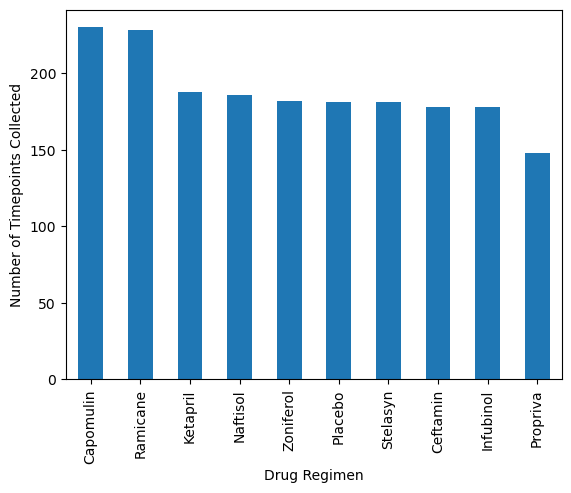

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barTime = cleanDF.groupby("Drug Regimen").count()["Timepoint"]
barTime = barTime.sort_values(ascending=False)
barTime.plot(kind="bar",ylabel="Number of Timepoints Collected")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

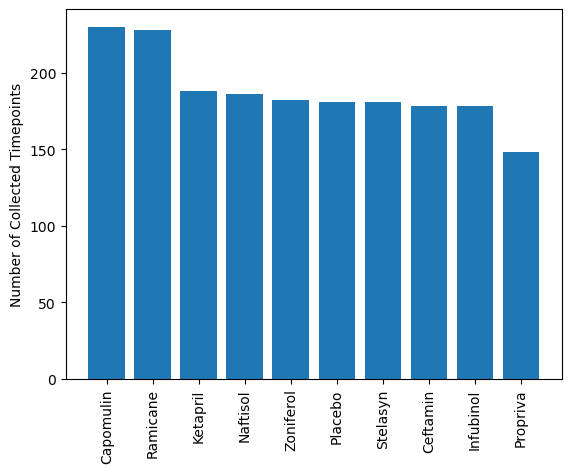

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = barTime.keys()
timepoints = barTime.to_list()
fig1Py = plt.bar(drugs,timepoints)
fig1Py = plt.ylabel("Number of Collected Timepoints")
fig1Py = plt.xticks(rotation=90)

display(fig1Py)

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

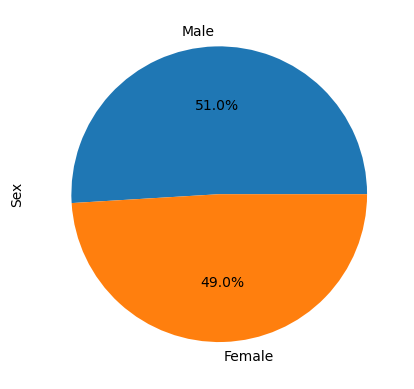

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexCount = cleanDF["Sex"].value_counts()
display(sexCount)
sexCount.plot(kind="pie",y="Sex",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7ff68e6cf8e0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

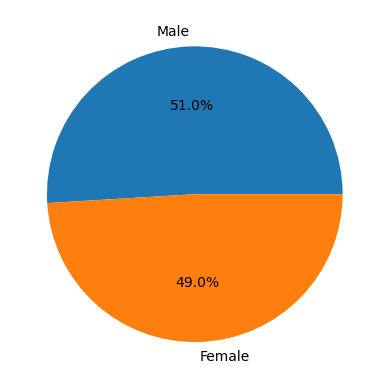

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexCountDict = dict(sexCount)

plt.pie(sexCount,labels=sexCountDict.keys(),autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
limTreatment = cleanDF.loc[cleanDF["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
lastTimeDF = limTreatment.groupby("Mouse ID").max("Timepoint")[["Timepoint"]]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastTimeLimDF = pd.merge(lastTimeDF,limTreatment,how="left",on=["Mouse ID","Timepoint"])

display(lastTimeLimDF.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = lastTimeLimDF["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    treatmentRows = lastTimeLimDF.loc[(lastTimeLimDF["Drug Regimen"] == treatment)]
    q1 = treatmentRows["Tumor Volume (mm3)"].quantile(.25)
    q3 = treatmentRows["Tumor Volume (mm3)"].quantile(.75)
    iqr = q3 - q1
    
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = treatmentRows["Tumor Volume (mm3)"]
    
    # add subset
    
    # Determine outliers using upper and lower bounds
    outliers = tumorVol[((tumorVol < lowerbound) | (tumorVol > upperbound))]
    print(f"{treatment}'s potential outliers: {outliers}")

Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

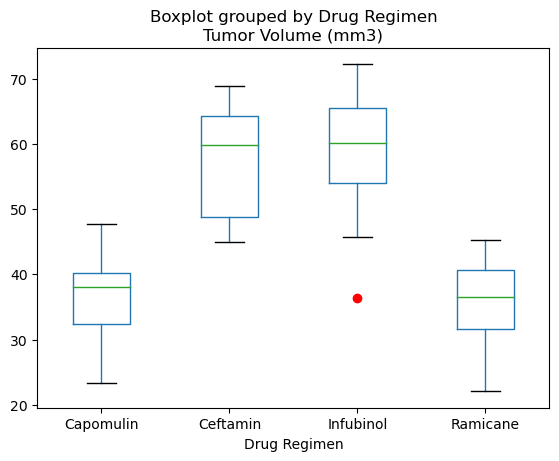

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
lastTimeLimDF.boxplot(by = "Drug Regimen", column="Tumor Volume (mm3)",grid=False,sym="r")


## Line and Scatter Plots

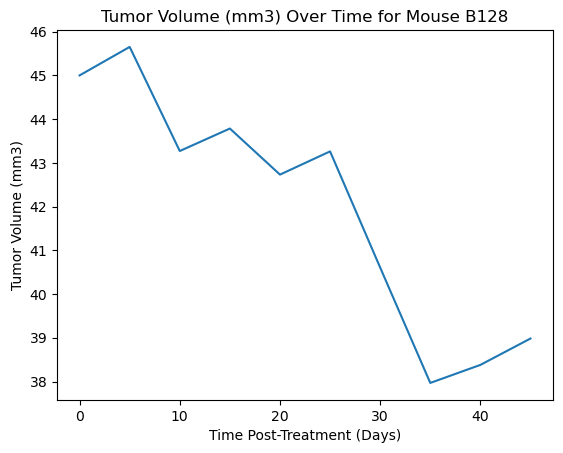

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinDF = cleanDF[cleanDF["Drug Regimen"] == "Capomulin"]
mouseB128 = cleanDF[cleanDF["Mouse ID"] == "b128"]

plt.plot(mouseB128["Timepoint"],mouseB128["Tumor Volume (mm3)"])
plt.title("Tumor Volume (mm3) Over Time for Mouse B128")
plt.xlabel("Time Post-Treatment (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0.5, 1.0, 'Average Tumor Volume for the Average Weight of Each Mouse Treated with Capomulin')

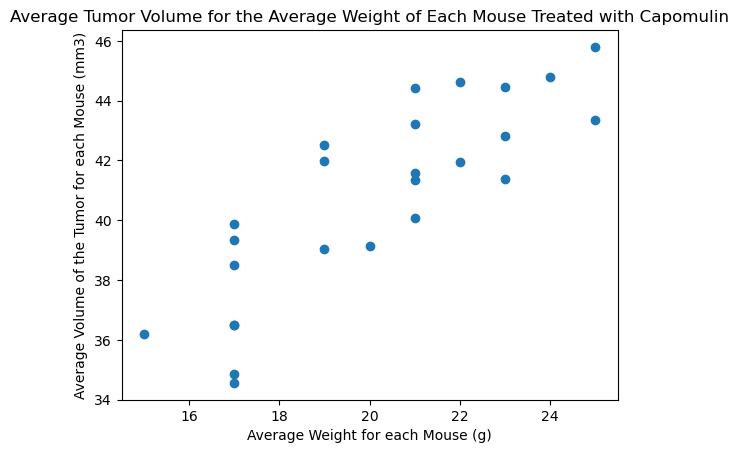

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulinWeight = capomulinDF.groupby("Mouse ID").mean()["Weight (g)"]
capomulinTumor = capomulinDF.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
plt.scatter(capomulinWeight,capomulinTumor)
plt.xlabel("Average Weight for each Mouse (g)")
plt.ylabel("Average Volume of the Tumor for each Mouse (mm3)")
plt.title("Average Tumor Volume for the Average Weight of Each Mouse Treated with Capomulin")

## Correlation and Regression

The correlation between mouse weight (g) and the average tumor volume (mm3) is 0.84


Text(0.5, 1.0, 'Average Tumor Volume for the Average Weight of Each Mouse Treated with Capomulin')

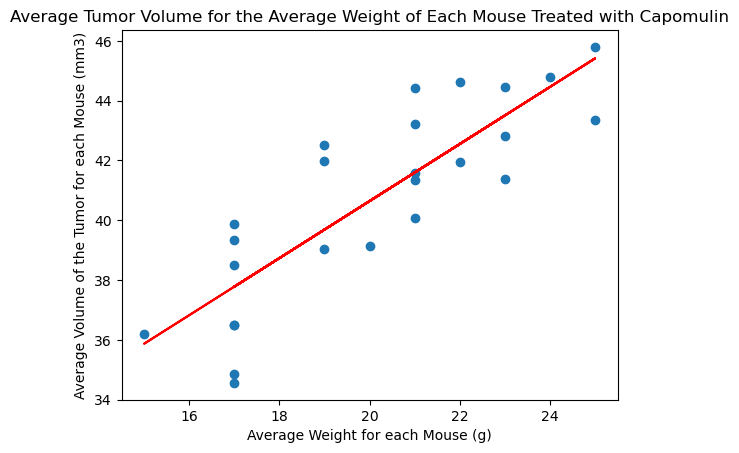

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinWeight, capomulinTumor)
capomulinRegress = capomulinWeight * slope + intercept

print(f"The correlation between mouse weight (g) and the average tumor volume (mm3) is {rvalue:,.2f}")

plt.scatter(capomulinWeight,capomulinTumor)
plt.plot(capomulinWeight,capomulinRegress,"r-")
plt.xlabel("Average Weight for each Mouse (g)")
plt.ylabel("Average Volume of the Tumor for each Mouse (mm3)")
plt.title("Average Tumor Volume for the Average Weight of Each Mouse Treated with Capomulin")